# Orbitals 2
The values of orbitals at given coordinates are available with VeloxChem from the `get_mo` method of the `VisualizationDriver` class.

```{note}
Add MEP example?
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import py3Dmol
import veloxchem as vlx
from pyscf import gto, scf, tools

* Warning * Environment variable OMP_NUM_THREADS not set.
* Warning * Setting OMP_NUM_THREADS to 4.
* Warning * Setting MKL_THREADING_LAYER to "GNU".


Here we illustrate this by line structure, and more cartoonish image with and without coloring different strands differently. To the right we see white ribbons with manganese and calcium atoms colored in blue and red, respectively. These shows the position of the oxygen-evolving complex of photosystem II, which is the site of water-splitting and oxygen generation.

## Molecular orbitals and densities

In [4]:
thymine_xyz = """15
*
 C     0.095722    -0.037785    -1.093615
 C    -0.011848     1.408694    -1.113404
 C    -0.204706     2.048475     0.052807
 N    -0.302595     1.390520     1.249226
 C    -0.214596     0.023933     1.378238
 N    -0.017387    -0.607231     0.171757
 O     0.270287    -0.735594    -2.076393
 C     0.098029     2.096194    -2.424990
 H     1.052976     1.874860    -2.891573
 H     0.002157     3.170639    -2.310554
 H    -0.671531     1.743694    -3.104794
 O    -0.301905    -0.554734     2.440234
 H    -0.292790     3.119685     0.106201
 H     0.053626    -1.612452     0.215637
 H    -0.446827     1.892203     2.107092
"""

# Create veloxchem mol and basis objects
mol_vlx = vlx.Molecule.from_xyz_string(thymine_xyz)
bas_vlx = vlx.MolecularBasis.read(mol_vlx, "sto-3g")

# Perform SCF calculation
scf_gs = vlx.ScfRestrictedDriver()
scf_gs.compute(mol_vlx, bas_vlx)

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

### Using VeloxChem orbviewer:

Veloxchem includes a quick interactive orbital viewer for jupyter notebook, very useful to integrate in a workflow.

```{note}
As this is an interactive viewer, it will not be able to change the MO to visualize in the compiled html-book. It will work in a notebook, though.
```

In [5]:
viewer = vlx.OrbitalViewer()
viewer.plot(mol_vlx, bas_vlx, scf_gs.mol_orbs)

Output()

Dropdown(description='Orbital:', index=32, options=(('  1 occ=2.000 ene=-20.231', 0), ('  2 occ=2.000 ene=-20.…

### Create and dump cube-files:

Looking at HOMO, LUMO, and $\alpha$ density

```python
vis_drv = vlx.VisualizationDriver()

vis_drv.gen_cubes(
    cube_dict={
        "cubes": "mo(homo),mo(lumo),density(alpha)",
        "files": "../img/vis/water_HOMO.cube,../img/vis/water_LUMO.cube,../img/vis/water_a_density.cube",
    },
    molecule=mol_vlx,
    basis=bas_vlx,
    mol_orbs=scf_gs.mol_orbs,
    density=scf_gs.density,
)
```

### Illustrate, as overlaid over (stick) structure

```{note}
- Currently a bit low resolution
- Below figure is a static snapshot (in order to save server space and compilation time), and can thus not be manipulated interactively.
```

```python
viewer = py3Dmol.view(linked=False, viewergrid=(1, 3), width=800, height=300)

# HOMO
with open("../img/vis/water_HOMO.cube", "r") as f:
    cube = f.read()
# Plot strick structures
viewer.addModel(cube, "cube", viewer=(0, 0))
viewer.setStyle({"stick": {}}, viewer=(0, 0))
# Negative and positive nodes
viewer.addVolumetricData(
    cube, "cube", {"isoval": -0.02, "color": "blue", "opacity": 0.75}, viewer=(0, 0)
)
viewer.addVolumetricData(
    cube, "cube", {"isoval": 0.02, "color": "red", "opacity": 0.75}, viewer=(0, 0)
)
viewer.rotate(-45, "x", viewer=(0, 0))

# LUMO
with open("../img/vis/water_LUMO.cube", "r") as f:
    cube = f.read()
viewer.addModel(cube, "cube", viewer=(0, 1))
viewer.setStyle({"stick": {}}, viewer=(0, 1))
viewer.addVolumetricData(
    cube, "cube", {"isoval": -0.02, "color": "blue", "opacity": 0.75}, viewer=(0, 1)
)
viewer.addVolumetricData(
    cube, "cube", {"isoval": 0.02, "color": "red", "opacity": 0.75}, viewer=(0, 1)
)
viewer.rotate(-45, "x", viewer=(0, 1))

# Alpha density
with open("../img/vis/water_a_density.cube", "r") as f:
    cube = f.read()
viewer.addModel(cube, "cube", viewer=(0, 2))
viewer.setStyle({"stick": {}}, viewer=(0, 2))
viewer.addVolumetricData(
    cube, "cube", {"isoval": 0.02, "color": "red", "opacity": 0.75}, viewer=(0, 2)
)
viewer.rotate(-45, "x", viewer=(0, 2))

viewer.show()
```

![HOMO, LUMO and density of water](../img/vis/water-homo-lumo-dens.png)

## Radial distribution

In order to illustrate radial distributions, we consider the neon atom with a double-zeta basis set:

In [6]:
mol_str = """
Ne        0.00000000    0.00000000    0.00000000
"""
molecule = vlx.Molecule.read_str(mol_str)
basis = vlx.MolecularBasis.read(molecule, "cc-pVDZ")

scf_drv = vlx.ScfRestrictedDriver()
scf_drv.compute(molecule, basis)

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

### Valence orbitals

Considering the occupied MOs along the z-axis:

In [7]:
vis_drv = vlx.VisualizationDriver()

mol_orbs = scf_drv.mol_orbs
# define the coordinates (in Bohr) for which you wish values of orbitals
n = 100
coords = np.zeros((n, 3))
r = np.linspace(0, 2, n)
coords[:, 2] = r  # radial points along the z-axis

# get the values of orbitals
mo_1s = np.array(vis_drv.get_mo(coords, molecule, basis, mol_orbs, 0, "alpha"))
mo_2s = np.array(vis_drv.get_mo(coords, molecule, basis, mol_orbs, 1, "alpha"))
mo_2p_1 = np.array(vis_drv.get_mo(coords, molecule, basis, mol_orbs, 2, "alpha"))
mo_2p_2 = np.array(vis_drv.get_mo(coords, molecule, basis, mol_orbs, 3, "alpha"))
mo_2p_3 = np.array(vis_drv.get_mo(coords, molecule, basis, mol_orbs, 4, "alpha"))

# adjust signs
mo_1s = np.sign(mo_1s[10]) * mo_1s
mo_2s = np.sign(mo_2s[10]) * mo_2s
mo_2p_1 = np.sign(mo_2p_1[10]) * mo_2p_1
mo_2p_2 = np.sign(mo_2p_2[10]) * mo_2p_2
mo_2p_3 = np.sign(mo_2p_3[10]) * mo_2p_3

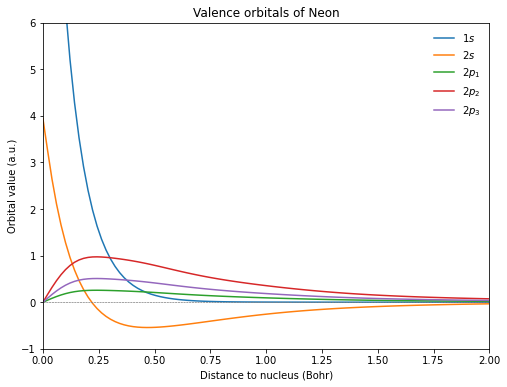

In [8]:
fig = plt.figure(1, figsize=(8, 6))

plt.plot(r, mo_1s, r, mo_2s, r, mo_2p_1, r, mo_2p_2, r, mo_2p_3)

plt.axhline(y=0.0, color="0.5", linewidth=0.7, dashes=[3, 1, 3, 1])
plt.setp(plt.gca(), xlim=(0, 2), ylim=(-1, 6))
plt.legend(
    [r"$1s$", r"$2s$", r"$2p_1$", r"$2p_2$", r"$2p_3$"],
    loc="upper right",
    frameon=False,
)

plt.title(r"Valence orbitals of Neon")
plt.xlabel(r"Distance to nucleus (Bohr)")
plt.ylabel(r"Orbital value (a.u.)")

plt.show()

### Atomic sub-shell densities

Looking at the densities of different sub-shells, we obtain:

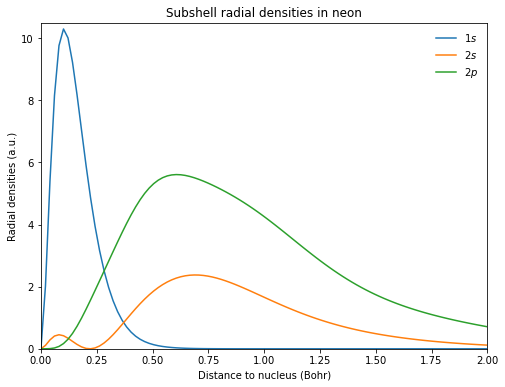

In [9]:
fig = plt.figure(2, figsize=(8, 6))

# additional factor of 2 from alpha and beta spin orbitals
rad_den_1s = 4 * np.pi * r ** 2 * 2 * mo_1s ** 2
rad_den_2s = 4 * np.pi * r ** 2 * 2 * mo_2s ** 2
rad_den_2p = 4 * np.pi * r ** 2 * 2 * (mo_2p_1 ** 2 + mo_2p_2 ** 2 + mo_2p_3 ** 2)

plt.plot(r, rad_den_1s, r, rad_den_2s, r, rad_den_2p)

plt.axhline(y=0.0, color="0.5", linewidth=0.7, dashes=[3, 1, 3, 1])
plt.setp(plt.gca(), xlim=(0, 2), ylim=(0.0, 10.5))
plt.legend([r"$1s$", r"$2s$", r"$2p$"], loc="upper right", frameon=False)

plt.title(r"Subshell radial densities in neon")
plt.xlabel(r"Distance to nucleus (Bohr)")
plt.ylabel(r"Radial densities (a.u.)")

plt.show()